# Facial Recognition and Facial Landmark Analysis with Python

In [1]:
!pip install face_recognition >&/dev/null  #Change Runtime type to T4 GPU

In [5]:
import requests
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon, LineString

In [3]:
# Download 3 random faces
image_paths = ["/content/frontal1.jpg", "/content/frontal2.jpg", "/content/frontal3.jpg"]
for path in image_paths:
    resp = requests.get("https://thispersondoesnotexist.com/")
    if resp.status_code == 200:
        with open(path, "wb") as f:
            f.write(resp.content)

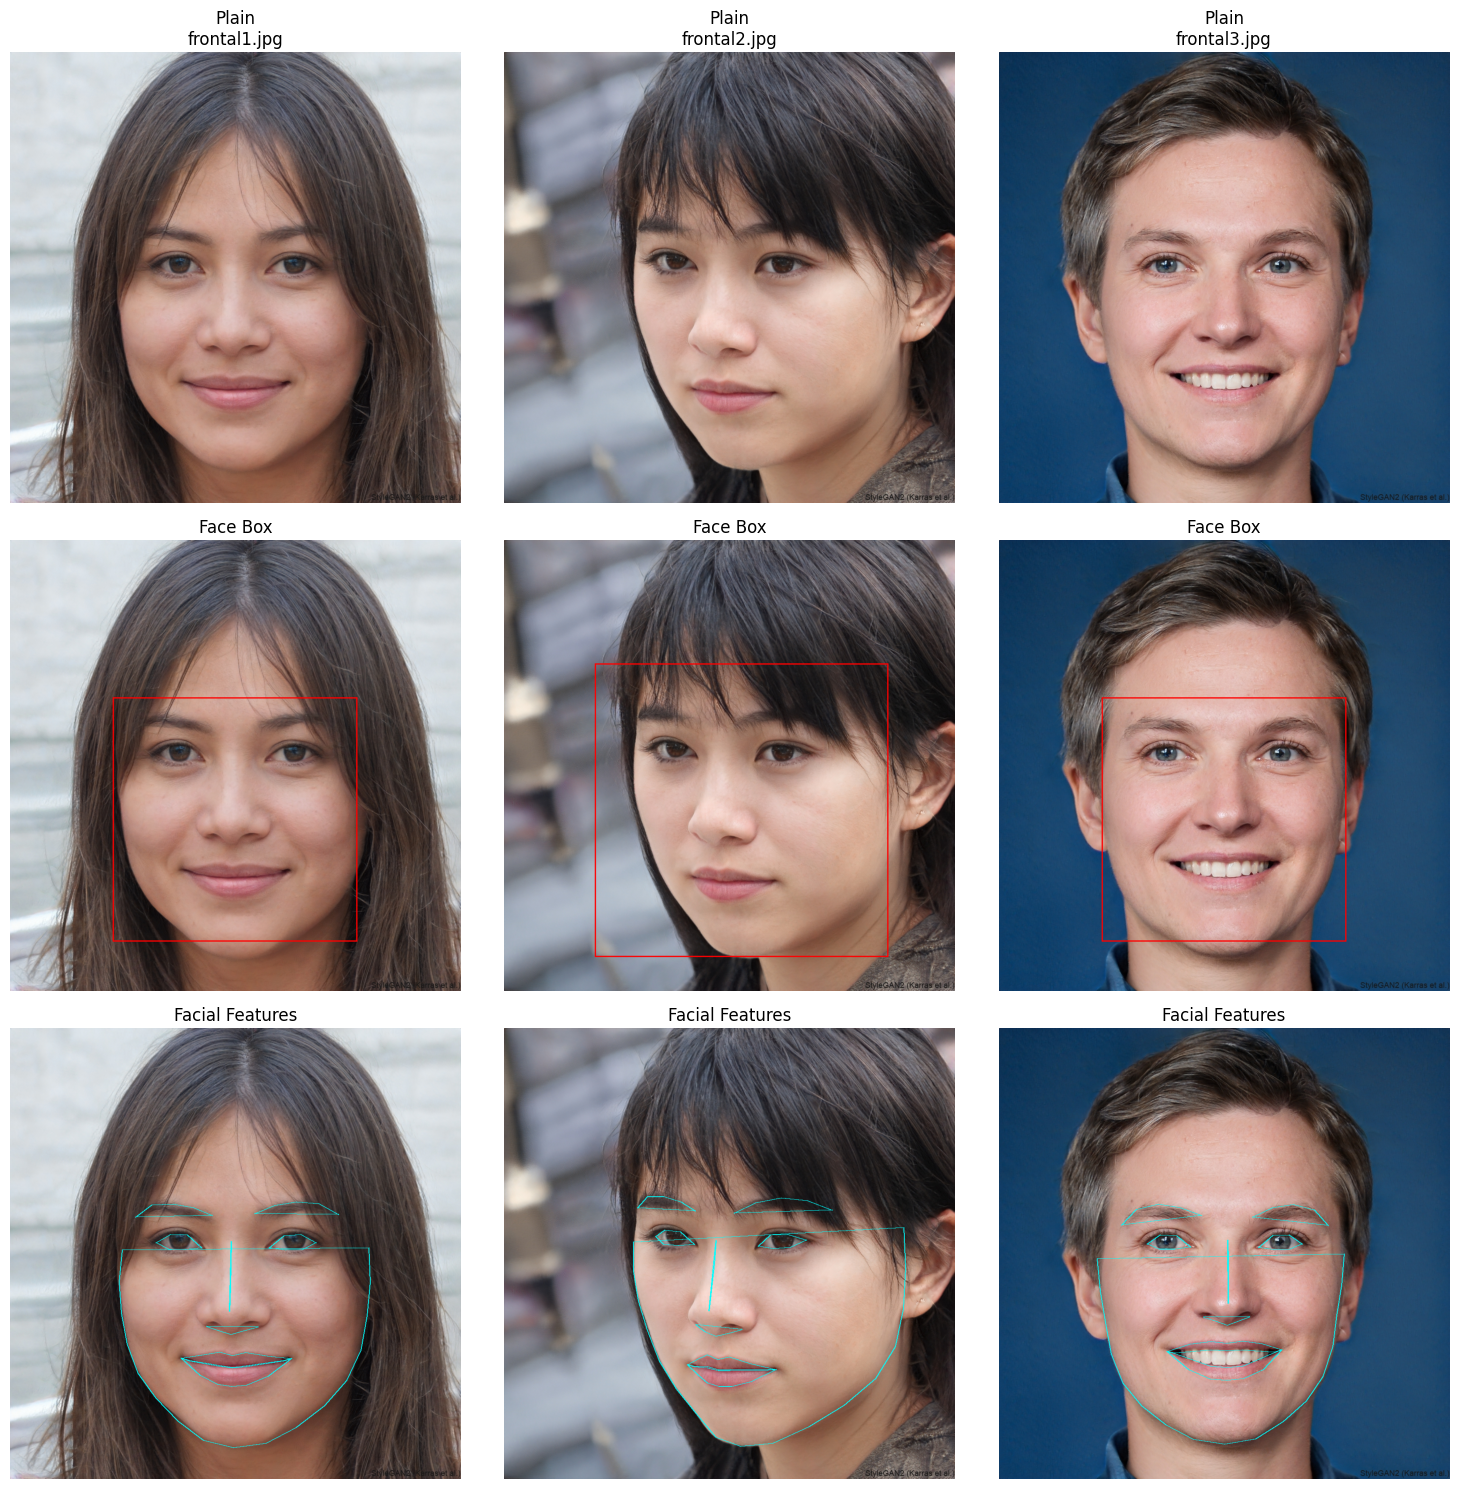

In [4]:
# Prepare 3x3 plot
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for col, path in enumerate(image_paths):
    # Load image
    image = face_recognition.load_image_file(path)
    pil_image = Image.fromarray(image)

    # --- Top row: plain image ---
    axs[0, col].imshow(pil_image)
    axs[0, col].axis('off')
    axs[0, col].set_title(f"Plain\n{path.split('/')[-1]}")

    # --- Middle row: face boxes ---
    img_box = pil_image.copy()
    draw_box = ImageDraw.Draw(img_box)
    face_locations = face_recognition.face_locations(image)
    for (top, right, bottom, left) in face_locations:
        draw_box.rectangle(((left, top), (right, bottom)), outline="red", width=3)
    axs[1, col].imshow(img_box)
    axs[1, col].axis('off')
    axs[1, col].set_title("Face Box")

    # --- Bottom row: facial features landmarks ---
    img_landmarks = pil_image.copy()
    draw_landmarks = ImageDraw.Draw(img_landmarks)
    landmarks_list = face_recognition.face_landmarks(image)
    for landmarks in landmarks_list:
        for feature, points in landmarks.items():
            # Draw lines connecting landmark points
            draw_landmarks.line(points + [points[0]], fill='cyan', width=2)
    axs[2, col].imshow(img_landmarks)
    axs[2, col].axis('off')
    axs[2, col].set_title("Facial Features")

plt.tight_layout()
plt.show()


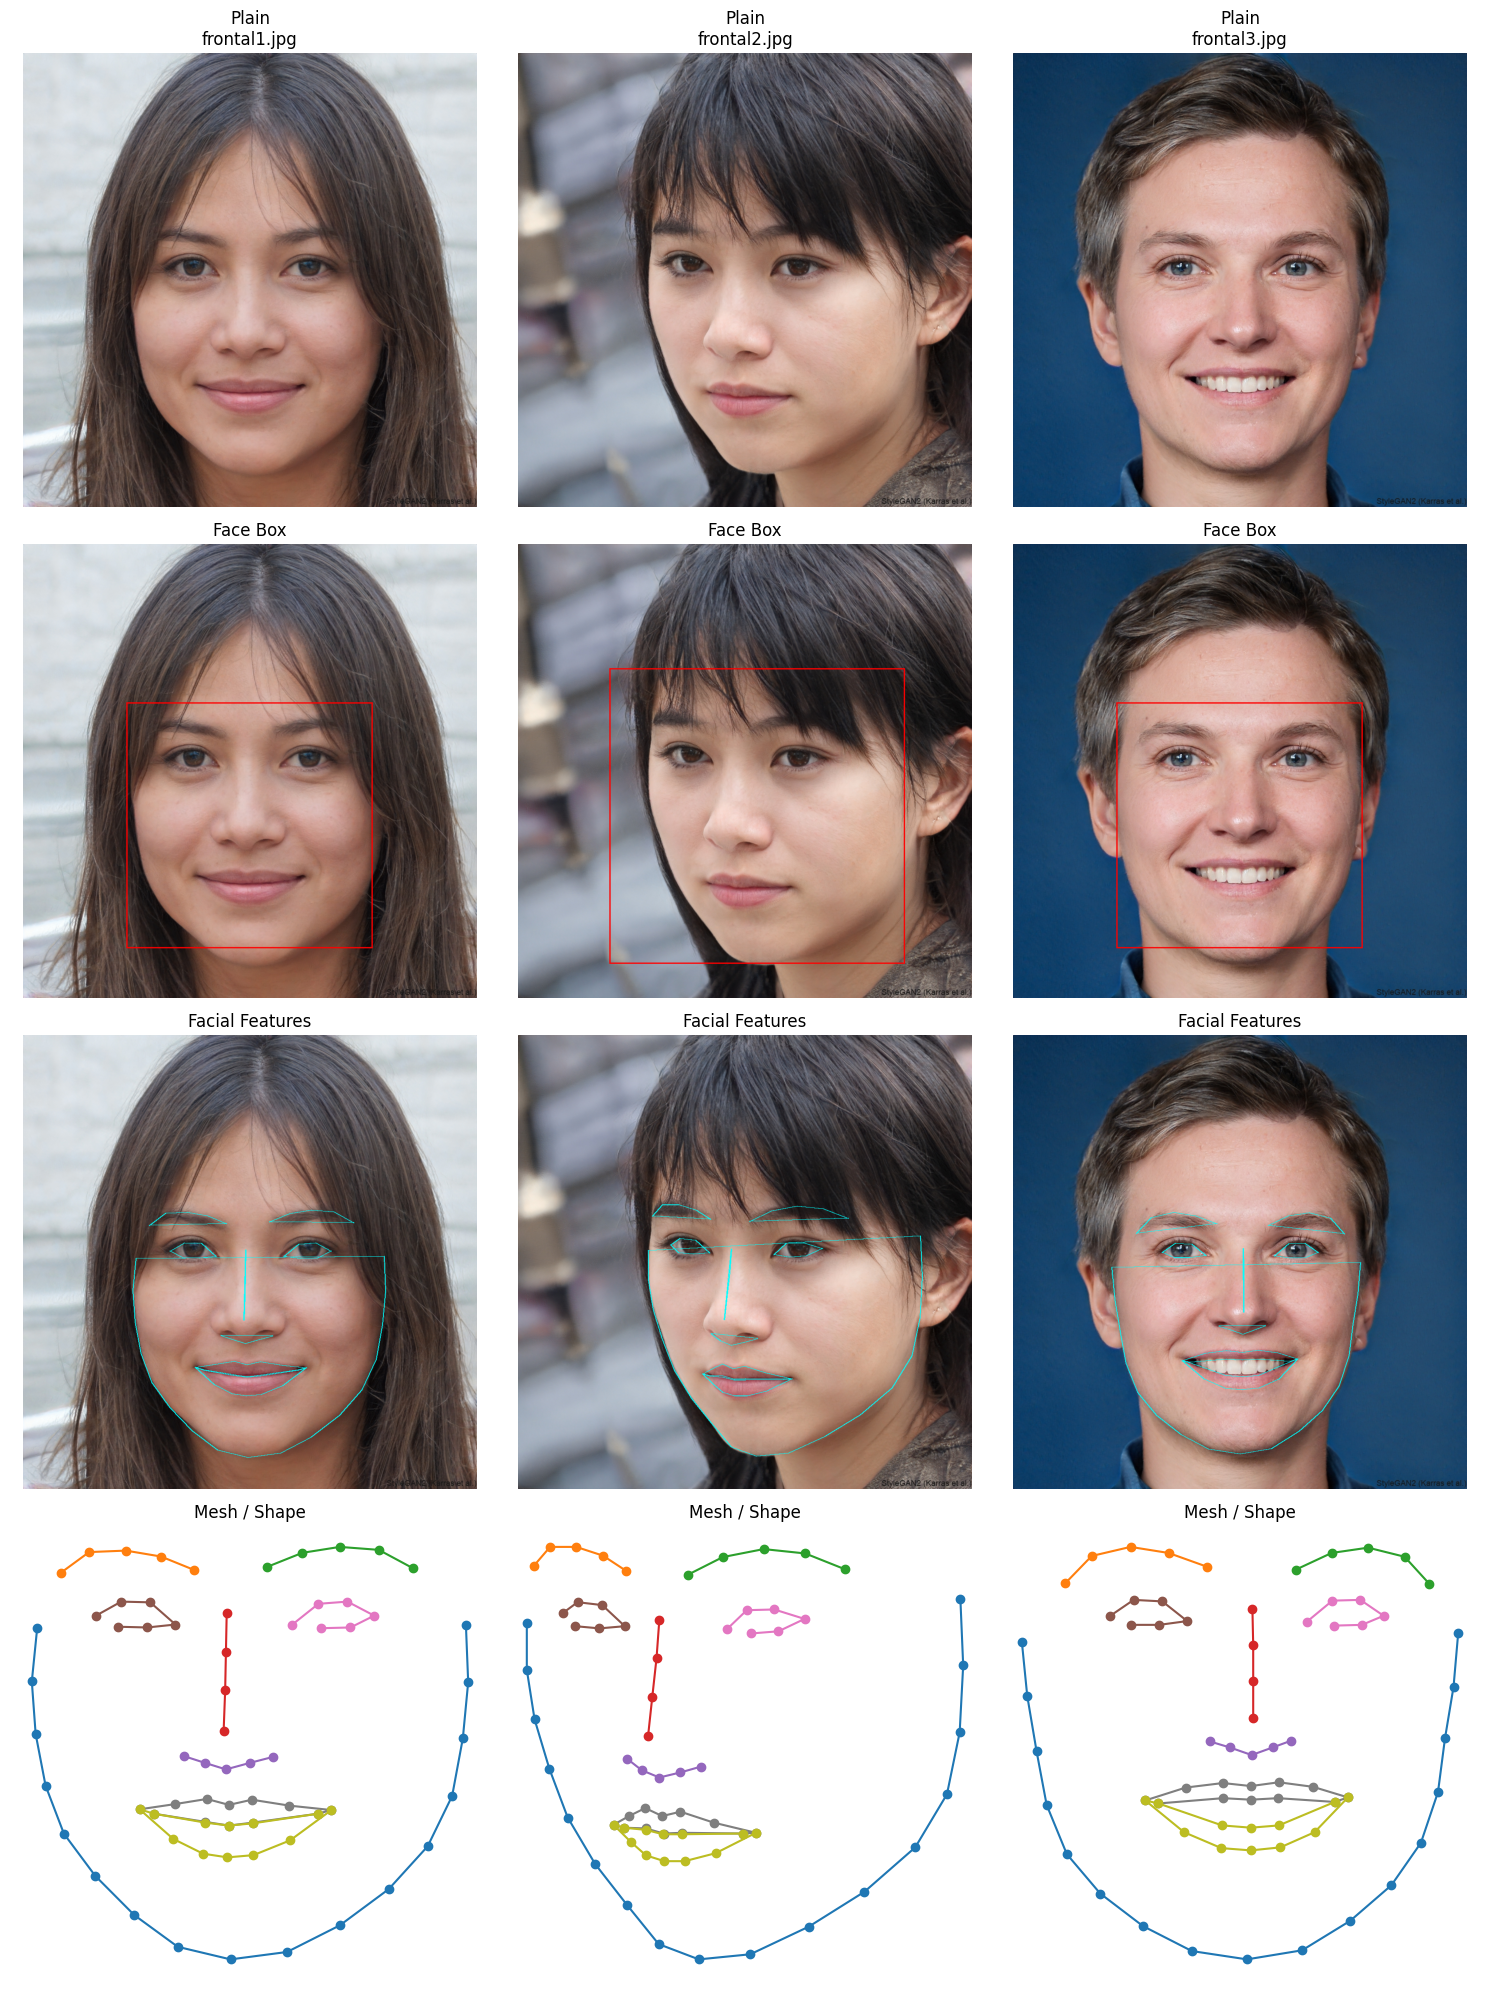

In [21]:
from shapely.geometry import LineString, Polygon
import matplotlib.pyplot as plt

# Prepare 4x3 plot (4 rows: plain, boxes, landmarks, mesh)
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for col, path in enumerate(image_paths):
    # Load image
    image = face_recognition.load_image_file(path)
    pil_image = Image.fromarray(image)

    # --- Top row: plain image ---
    axs[0, col].imshow(pil_image)
    axs[0, col].axis('off')
    axs[0, col].set_title(f"Plain\n{path.split('/')[-1]}")

    # --- 2nd row: face boxes ---
    img_box = pil_image.copy()
    draw_box = ImageDraw.Draw(img_box)
    face_locations = face_recognition.face_locations(image)
    for (top, right, bottom, left) in face_locations:
        draw_box.rectangle(((left, top), (right, bottom)), outline="red", width=3)
    axs[1, col].imshow(img_box)
    axs[1, col].axis('off')
    axs[1, col].set_title("Face Box")

    # --- 3rd row: facial landmarks ---
    img_landmarks = pil_image.copy()
    draw_landmarks = ImageDraw.Draw(img_landmarks)
    landmarks_list = face_recognition.face_landmarks(image)
    for landmarks in landmarks_list:
        for feature, points in landmarks.items():
            draw_landmarks.line(points + [points[0]], fill='cyan', width=2)
    axs[2, col].imshow(img_landmarks)
    axs[2, col].axis('off')
    axs[2, col].set_title("Facial Features")

    # --- 4th row: mesh from Shapely geometries ---
    axs[3, col].set_title("Mesh / Shape")
    axs[3, col].axis('off')

    # Example: draw each feature from landmarks as LineStrings
    for landmarks in landmarks_list:
        for feature, points in landmarks.items():
            line = LineString(points)
            x, y = line.xy
            axs[3, col].plot(x, y, marker='o')
    axs[3, col].invert_yaxis()  # optional: match image coordinates

plt.tight_layout()
plt.show()


In [6]:
# Initialize list for rows
data = []

# Process each image and extract geometric shapes
for img_idx, path in enumerate(image_paths):
    image = face_recognition.load_image_file(path)
    landmarks_list = face_recognition.face_landmarks(image)

    for face_idx, landmarks in enumerate(landmarks_list):
        for feature, points in landmarks.items():
            # Decide if shape should be a closed Polygon or open LineString
            if feature in ['top_lip', 'bottom_lip', 'left_eye', 'right_eye', 'nose_tip']:
                shape = Polygon(points)
            else:
                shape = LineString(points)

            data.append({
                'image': path.split('/')[-1],
                'face_index': face_idx,
                'feature': feature,
                'geometry': shape
            })

# Create DataFrame
df_shapes = pd.DataFrame(data)

# Optional: display the DataFrame
df_shapes


image  face_index        feature  \
0   frontal1.jpg           0           chin   
1   frontal1.jpg           0   left_eyebrow   
2   frontal1.jpg           0  right_eyebrow   
3   frontal1.jpg           0    nose_bridge   
4   frontal1.jpg           0       nose_tip   
5   frontal1.jpg           0       left_eye   
6   frontal1.jpg           0      right_eye   
7   frontal1.jpg           0        top_lip   
8   frontal1.jpg           0     bottom_lip   
9   frontal2.jpg           0           chin   
10  frontal2.jpg           0   left_eyebrow   
11  frontal2.jpg           0  right_eyebrow   
12  frontal2.jpg           0    nose_bridge   
13  frontal2.jpg           0       nose_tip   
14  frontal2.jpg           0       left_eye   
15  frontal2.jpg           0      right_eye   
16  frontal2.jpg           0        top_lip   
17  frontal2.jpg           0     bottom_lip   
18  frontal3.jpg           0           chin   
19  frontal3.jpg           0   left_eyebrow   
20  frontal3.jpg           0  right_eyebrow   
21  frontal3.jpg           0    nose_bridge   
22  frontal3.jpg           0       nose_tip   
23  frontal3.jpg           0       left_eye   
24  frontal3.jpg           0      right_eye   
25  frontal3.jpg           0        top_lip   
26  frontal3.jpg           0     bottom_lip   

                                             geometry  
0   LINESTRING (254 504, 247 576, 252 647, 265 717...  
1   LINESTRING (285 429, 322 401, 370 399, 416 407...  
2   LINESTRING (555 421, 601 402, 650 394, 701 398...  
3     LINESTRING (502 484, 501 536, 500 588, 498 643)  
4   POLYGON ((446 677, 473 686, 501 695, 533 686, ...  
5   POLYGON ((331 487, 364 468, 402 469, 435 499, ...  
6   POLYGON ((588 499, 622 471, 660 468, 695 487, ...  
7   POLYGON ((388 749, 434 742, 476 735, 505 743, ...  
8   POLYGON ((639 750, 585 791, 537 811, 503 814, ...  
9   LINESTRING (293 486, 293 551, 304 619, 325 687...  
10  LINESTRING (303 408, 326 382, 363 382, 401 394...  
11  LINESTRING (522 420, 571 396, 629 385, 688 391...  
12    LINESTRING (481 482, 477 535, 471 588, 465 642)  
13  POLYGON ((435 673, 456 689, 481 699, 511 692, ...  
14  POLYGON ((344 473, 365 458, 400 462, 432 491, ...  
15  POLYGON ((577 495, 605 469, 644 468, 687 481, ...  
16  POLYGON ((416 764, 438 752, 461 741, 485 752, ...  
17  POLYGON ((618 775, 561 803, 517 814, 488 814, ...  
18  LINESTRING (222 524, 229 596, 241 669, 254 740...  
19  LINESTRING (278 447, 312 411, 362 399, 411 407...  
20  LINESTRING (575 429, 621 407, 668 400, 715 412...  
21    LINESTRING (519 481, 520 529, 520 576, 520 625)  
22  POLYGON ((464 656, 490 664, 518 674, 545 664, ...  
23  POLYGON ((336 490, 366 469, 403 471, 435 497, ...  
24  POLYGON ((589 498, 622 470, 658 469, 688 490, ...  
25  POLYGON ((381 734, 433 717, 481 711, 517 715, ...  
26  POLYGON ((642 730, 599 776, 555 796, 517 800, ...

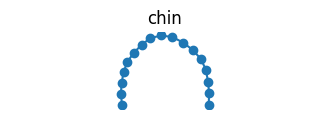

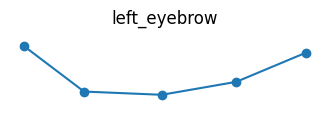

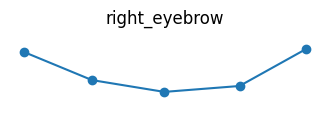

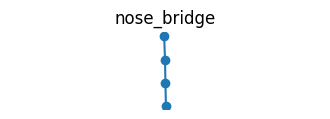

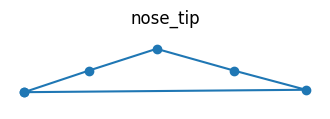

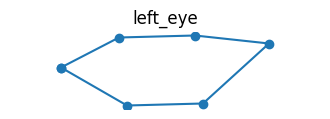

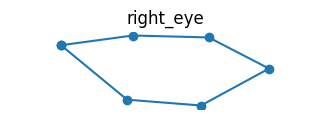

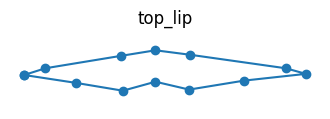

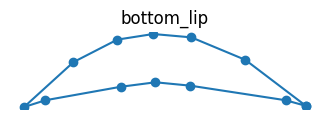

In [20]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon

# Example: features_and_geometry has 'feature' and 'geometry' columns
for feature, geom in zip(features_and_geometry['feature'], features_and_geometry['geometry']):
    plt.figure(figsize=(4, 1))

    # Shapely: get coordinates for plotting
    if isinstance(geom, LineString):
        x, y = geom.xy
    elif isinstance(geom, Polygon):
        x, y = geom.exterior.xy
    else:
        continue  # skip unsupported types

    plt.plot(x, y, marker='o')
    plt.title(feature)
    plt.axis('equal')
    plt.axis('off')
    plt.show()


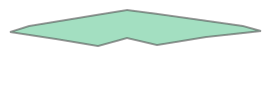

In [13]:
df_shapes[
(df_shapes["image"] == "frontal1.jpg") & (df_shapes["feature"] == "top_lip")
]["geometry"].values[0]

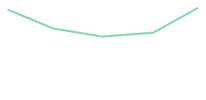

In [10]:
df_shapes[
(df_shapes["image"] == "frontal1.jpg") & (df_shapes["feature"] == "right_eyebrow")
]["geometry"].values[0]

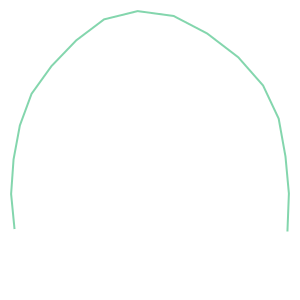

In [11]:
df_shapes[
(df_shapes["image"] == "frontal1.jpg") & (df_shapes["feature"] == "chin")
]["geometry"].values[0]

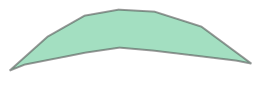

In [ ]:
df_shapes.geometry.iloc[8]